<a href="https://colab.research.google.com/github/Montenate/Wind-Energy-Modeling/blob/main/Wind_Farm_Model_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install windpowerlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.2 MB/s eta 0:00:00


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import data as wt
from windpowerlib import TurbineClusterModelChain, WindTurbine, WindFarm,ModelChain

In [4]:
Weather_Data = pd.read_csv('24 - weather-montreal.csv',index_col=0,header=[0,1],date_parser=lambda idx: pd.to_datetime(idx, utc=True)) #header used to merge the 1st and 2nd row to 1, as the column title | the rest for modifying the time
Weather_Data

<ipython-input-4-6035a8875b3d>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Weather_Data = pd.read_csv('24 - weather-montreal.csv',index_col=0,header=[0,1],date_parser=lambda idx: pd.to_datetime(idx, utc=True)) #header used to merge the 1st and 2nd row to 1, as the column title | the rest for modifying the time


variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


In [5]:
Selected_turbine = {'turbine_type': 'E48/800', 'hub_height': 60} #we using the exact same Wind Turbine type because we can compare power result with the signle turbne. we can use others as well
W_Turbine = WindTurbine(**Selected_turbine)

In [8]:
#For when you are using different type of turbine for your farm:
#wind_turbine_fleet = pd.DataFrame({'wind_turbine': [W_Turbine, None],
#                                   'number_of_turbines': [10, None]})
#                                   # 'total_capacity': [8000, None] #if you don't have the number of wind turbines.

# To add another wind turbine type, you make another selection (exact code in previous code box) and then put the variable in the 'None' position in the dictionary above.
# Put the corresponding number too

#For when you are using a one type of turbine for your farm:
farm_data ={
            'wind_turbine_fleet': [W_Turbine.to_group(10)],
            'efficiency': 0.9
}

farm_data_2 = WindFarm(**farm_data)

Wind_Farm_Submodel = {
                      'wake_losses_model': 'wind_farm_efficiency',            # 'dena_mean' (default)
                      'smoothing': True,                                      # False (default)
                      'turbulence_intensity': 'standard_deviation_method',    # Staffell_Pfenniger

                      'wind_speed_model': 'hellman',
                      'density_model': 'ideal_gas',
                      'temperature_model': 'linear_gradient',
                      'power_output_model': 'power_curve',
                      'density_correction': True,
                      'obstacle_height': 0,
                      'hellman_exp': 0.25
                      }

Model_Farm = TurbineClusterModelChain(farm_data_2, **Wind_Farm_Submodel).run_model(Weather_Data)

Farm_Power_Output = (Model_Farm.power_output)/1000

Farm_Power_Output

,feedin_power_plant
2019-01-01 00:00:00+00:00,5143.800555
2019-01-01 01:00:00+00:00,5336.078841
2019-01-01 02:00:00+00:00,4558.117848
2019-01-01 03:00:00+00:00,1690.422179
2019-01-01 04:00:00+00:00,30.979601
...,...
2019-12-31 19:00:00+00:00,317.855421
2019-12-31 20:00:00+00:00,586.182770
2019-12-31 21:00:00+00:00,1620.965002
2019-12-31 22:00:00+00:00,2868.697185


In [11]:
#Turbine Output from Single turbine Model

Turbine_sub_models = {
    'wind_speed_model': 'hellman',                    #'logarithmic' (default - when a model is not selected in your code)
                                                      #'interpolation-extrapolation'

    'density_model': 'ideal_gas',                     #'barometric' (default)
                                                      #'interpolation-extrapolation'

    'temperature_model': 'linear_gradient',           #'interpolation-extrapolation'

    'power_output_model': 'power_coefficient_curve',   #'power_curve' (default)

    'density_correction': True,                        # False (default)

    'obstacle_height': 0,                              # 0 (default)

    'hellman_exp': 0.25                               # 0.1, 0.15, 0.2, 0.25, 0.3, 0.4 (depending on Land Type)
}

Model = ModelChain(W_Turbine, **Turbine_sub_models).run_model(Weather_Data)

Turbine_Power_Output = (Model.power_output)/1000
Turbine_Power_Output

,feedin_power_plant
2019-01-01 00:00:00+00:00,607.007263
2019-01-01 01:00:00+00:00,632.135315
2019-01-01 02:00:00+00:00,518.769474
2019-01-01 03:00:00+00:00,167.707041
2019-01-01 04:00:00+00:00,1.009322
...,...
2019-12-31 19:00:00+00:00,28.706123
2019-12-31 20:00:00+00:00,57.379249
2019-12-31 21:00:00+00:00,160.043377
2019-12-31 22:00:00+00:00,289.477526


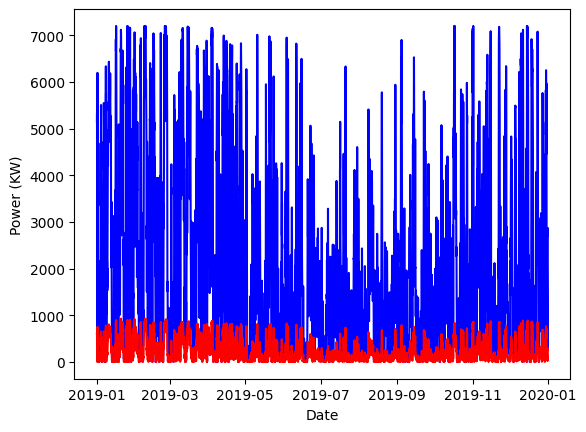

In [12]:
plt.plot(Farm_Power_Output, c= 'b')
plt.plot(Turbine_Power_Output, c= 'r')
plt.xlabel('Date')
plt.ylabel('Power (KW)')
plt.show()